# Stormfront Dataset from Kleinberg et al.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('.././data/kleinberg/stormfront_data_full.csv')


In [3]:
cols = df.columns
print("Number of rows: ", len(df))
print("Columns:")
for col in cols:
    print("    "+col) 
print("\n")
print("Number of unique users: ", len(df['stormfront_user'].unique()))
print("Number of unique topics: ", len(df['stormfront_topic'].unique()))
print("\n")
print("Number of missing values in each column:")
print(df.isnull().sum())
print("\n")
print("Average length of content: ", df['stormfront_self_content'].str.len().mean())

print(df.head())

Number of rows:  2033706
Columns:
    Unnamed: 0
    stormfront_self_content
    stormfront_lang_id
    stormfront_publication_date
    stormfront_topic
    stormfront_docid
    stormfront_category
    stormfront_user


Number of unique users:  55872
Number of unique topics:  119466


Number of missing values in each column:
Unnamed: 0                      0
stormfront_self_content         0
stormfront_lang_id              0
stormfront_publication_date     0
stormfront_topic               35
stormfront_docid                0
stormfront_category             0
stormfront_user                 0
dtype: int64


Average length of content:  623.3840894406566
   Unnamed: 0                            stormfront_self_content  \
0           1  \nWelcome to the Stormfront discussion board!\...   
1           2  \r\n\t\t\t\r\n\t\t\tPlease allow me to be the ...   
2           3  \r\n\t\t\t\r\n\t\t\tBonjour and thank you for ...   
3           4  \r\n\t\t\t\r\n\t\t\tI check in from time to ti...   


In [4]:
lang_ids = df['stormfront_lang_id'].unique()
print("Possible values for stormfront_lang_id:", lang_ids)

print(df.head())

Possible values for stormfront_lang_id: [19 98 71 16 27 39 63 65 25 21 53 69 15 33 82 11 13 79 35 52 64 73 78 88
 48]
   Unnamed: 0                            stormfront_self_content  \
0           1  \nWelcome to the Stormfront discussion board!\...   
1           2  \r\n\t\t\t\r\n\t\t\tPlease allow me to be the ...   
2           3  \r\n\t\t\t\r\n\t\t\tBonjour and thank you for ...   
3           4  \r\n\t\t\t\r\n\t\t\tI check in from time to ti...   
4           5  \r\n\t\t\t\r\n\t\t\tHello to all! This site se...   

   stormfront_lang_id stormfront_publication_date  \
0                  19         2001-10-26T16:17:00   
1                  19         2013-10-28T13:04:00   
2                  19         2013-11-08T10:57:00   
3                  19         2013-11-10T15:24:00   
4                  19         2013-11-12T01:24:00   

                                    stormfront_topic  stormfront_docid  \
0                    Welcome: Guidelines for Posting           8424610   
1  NEW

In [ ]:
import matplotlib.pyplot as plt
# Calculate the number of words for every post
df['word_count'] = df['stormfront_self_content'].str.split().str.len()

# Plot the word count
plt.figure(figsize=(10, 6))
plt.plot(df['word_count'])
plt.xlabel('Post Index')
plt.ylabel('Word Count')
plt.title('Word Count for Every Post')
plt.show()

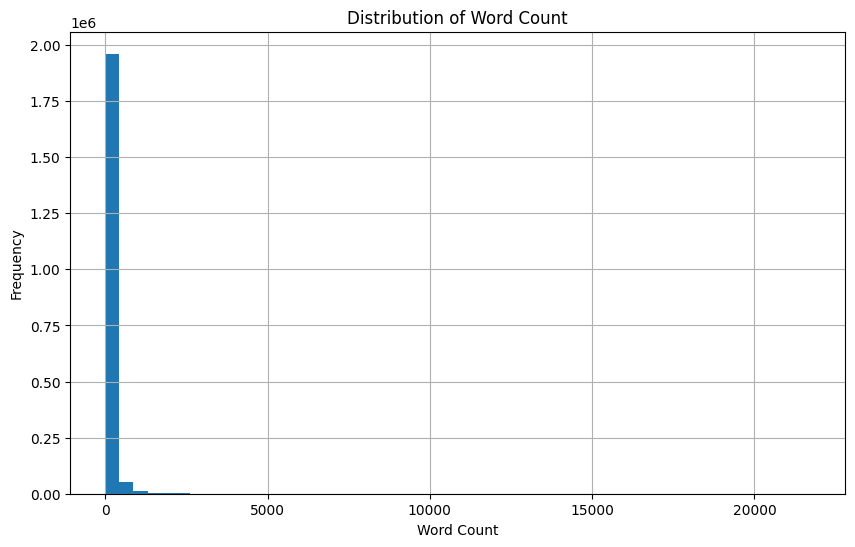

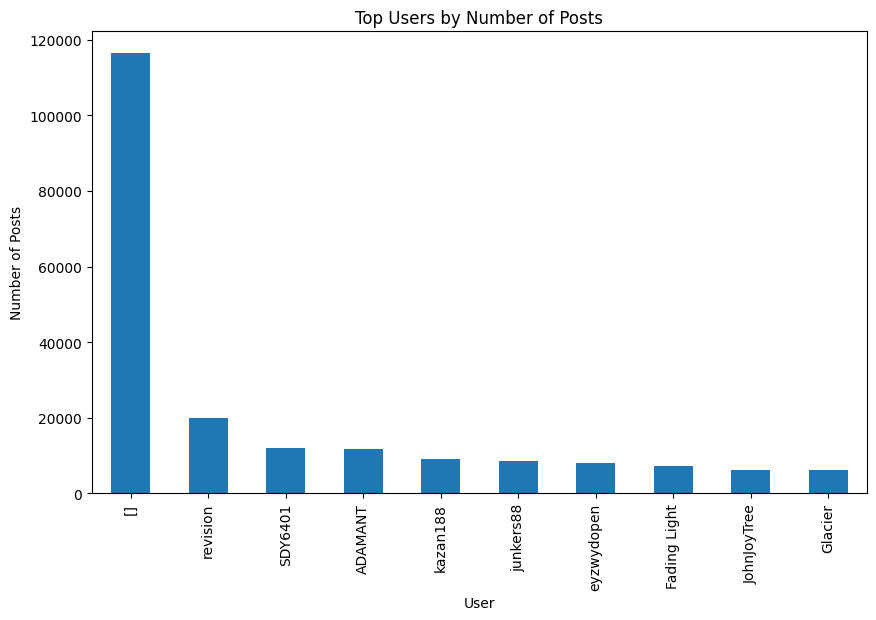

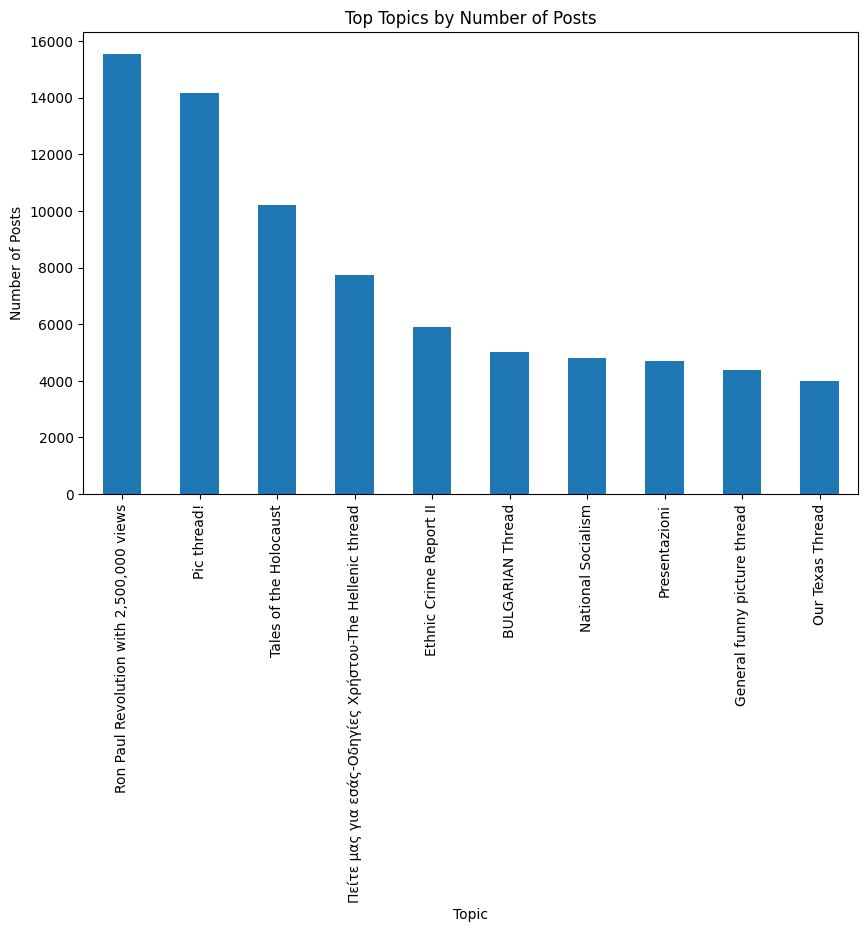

c:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


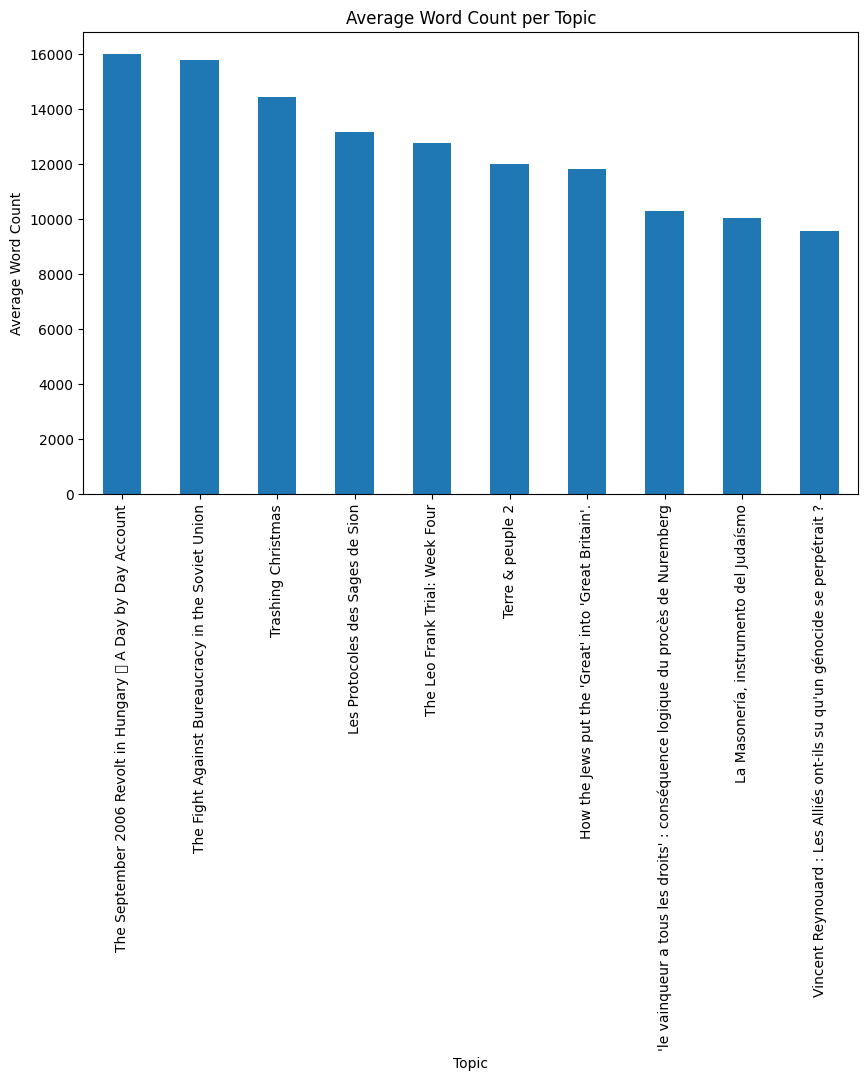

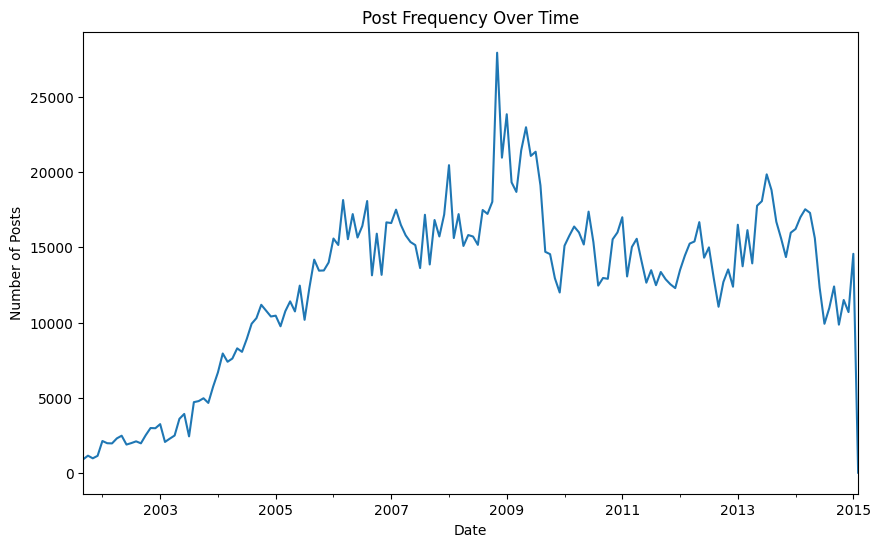

In [ ]:
# Distribution of Word Count
plt.figure(figsize=(10, 6))
df['word_count'].hist(bins=50)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Count')
plt.show()

# Top Users by Number of Posts
top_users = df['stormfront_user'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar')
plt.xlabel('User')
plt.ylabel('Number of Posts')
plt.title('Top Users by Number of Posts')
plt.show()

# Top Topics by Number of Posts
top_topics = df['stormfront_topic'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_topics.plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Number of Posts')
plt.title('Top Topics by Number of Posts')
plt.show()

# Average Word Count per Topic
avg_word_count_per_topic = df.groupby('stormfront_topic')['word_count'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_word_count_per_topic.plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Average Word Count')
plt.title('Average Word Count per Topic')
plt.show()

# Post Frequency Over Time
df['stormfront_publication_date'] = pd.to_datetime(df['stormfront_publication_date'])
posts_over_time = df.set_index('stormfront_publication_date').resample('M').size()
plt.figure(figsize=(10, 6))
posts_over_time.plot()
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Post Frequency Over Time')
plt.show()

In [3]:
import json
import csv

# Convert the publication date to datetime format
df['stormfront_publication_date'] = pd.to_datetime(df['stormfront_publication_date'])

# Filter the dataframe to include only posts from 2014 and onwards
df_2014_onwards = df[df['stormfront_publication_date'].dt.year >= 2014]

# Identify topics that have posts before 2014
topics_before_2014 = df[df['stormfront_publication_date'].dt.year < 2014]['stormfront_topic'].unique()

# Filter out these topics from the 2014 onwards dataframe
df_2014_onwards = df_2014_onwards[~df_2014_onwards['stormfront_topic'].isin(topics_before_2014)]

# Filter out topics that contain content that does not have lang_id 19
topics_with_non_lang_id_19 = df[df['stormfront_lang_id'] != 19]['stormfront_topic'].unique()
df_2014_onwards = df_2014_onwards[~df_2014_onwards['stormfront_topic'].isin(topics_with_non_lang_id_19)]


# Save the filtered dataframe to a CSV file
#df_2014_onwards.to_csv('stormfront_data_2014_onwards.csv', index=False)


# Group by topic and count the number of posts in each topic
topic_counts = df_2014_onwards['stormfront_topic'].value_counts()

# Clean content by removing leading and trailing whitespaces and replacing multiple whitespaces with a single whitespace
df_2014_onwards['stormfront_self_content'] = df_2014_onwards['stormfront_self_content'].str.strip()
df_2014_onwards['stormfront_self_content'] = df_2014_onwards['stormfront_self_content'].str.replace('\s+', ' ', regex=True)
# Remove any "\t", "\n", "\r", etc. from the content
df_2014_onwards['stormfront_self_content'] = df_2014_onwards['stormfront_self_content'].str.replace(r'[\t\n\r]', ' ', regex=True)

# Clean topic by removing leading and trailing whitespaces and replacing multiple whitespaces with a single whitespace
df_2014_onwards['stormfront_topic'] = df_2014_onwards['stormfront_topic'].str.strip()
df_2014_onwards['stormfront_topic'] = df_2014_onwards['stormfront_topic'].str.replace('\s+', ' ', regex=True)
# Remove any "\t", "\n", "\r", etc. from the topic
df_2014_onwards['stormfront_topic'] = df_2014_onwards['stormfront_topic'].str.replace(r'[\t\n\r]', ' ', regex=True)

# Remove URLs from the content
df_2014_onwards['stormfront_self_content'] = df_2014_onwards['stormfront_self_content'].str.replace(r'http\S+|www.\S+', '', case=False, regex=True)

# Group by topic and concatenate all posts in each topic along with their associated users
grouped_df = df_2014_onwards.groupby("stormfront_topic").apply(
    lambda x: {docid: {"username": user, "content": content}  # Use docid as keys
               for docid, content, user in zip(x["stormfront_docid"], x["stormfront_self_content"], x["stormfront_user"])}
).reset_index()

# Rename the columns for clarity
grouped_df.columns = ['stormfront_topic', 'content_user_list']

# Calculate the number of posts in each topic
grouped_df['num_posts'] = grouped_df['content_user_list'].apply(len)

# Calculate total content length in each topic thread
grouped_df['content_length'] = grouped_df['content_user_list'].apply(
    lambda x: sum(len(post["content"]) for post in x.values())
)

# Convert to JSON string format only when necessary (e.g., for saving)
grouped_df["content_user_list"] = grouped_df["content_user_list"].apply(
    lambda x: json.dumps(x, ensure_ascii=False)
)

# Convert to JSON string format (only if needed for storage or exporting)
#grouped_df["content_user_list"] = grouped_df["content_user_list"].apply(json.dumps, ensure_ascii=False)
print(len(grouped_df))
print("Total number of posts in grouped_df:", grouped_df['num_posts'].sum())
print(grouped_df.head())




grouped_df.to_csv('grouped_stormfront_data_2014_4.csv', index=False, quoting=csv.QUOTE_MINIMAL, quotechar='"')


8114
Total number of posts in grouped_df: 72988
                                    stormfront_topic  \
0  " Paranoia leads Vladimir Putin to the point o...   
1  " The 3 Most Damaging Words You Can Tell Your ...   
2                           "******'s Been Run Over"   
3  "A 14-year old allegedly wrote this poem" (som...   
4  "A Day in the life of Henril Harlaut" Olympic ...   

                                   content_user_list  num_posts  \
0  {"8565105": {"username": "Elcyrus", "content":...          4   
1  {"8576282": {"username": "mmafan", "content": ...         39   
2  {"9355760": {"username": "cardinal beaton", "c...          9   
3  {"8564053": {"username": "Gladiatrix", "conten...          4   
4  {"11100019": {"username": "Mr.PC", "content": ...          1   

   content_length  
0            1229  
1           11961  
2            3141  
3            1223  
4             224  


In [ ]:
df2 = pd.read_csv('grouped_stormfront_data_2014_3.csv')

test = json.loads(df2.iloc[0]['content_user_list'])
print(test)


{'8565105': {'username': 'Elcyrus', 'content': '. Bizarre... " As Sunday\x92s referendum, in which the people of Crimea will decide whether to join Russia, approaches, the images on Russian television are astonishing. They are more propagandistic and venomous than anything I can remember even from Soviet times. Breathless presenters whip up hysteria with bloodcurdling stories of atrocities being committed by the \x93neo-Nazi junta\x94 now governing Ukraine. Overheated \x93victims\x94 beg Putin to help, kindly Russians offer to give refuge to the terrified people fleeing Ukraine, and menacing music accompanies montages of swastikas, fascist thugs armed with clubs, and black-and-white images of Hitler\x92s troops and burning villages. " Paranoia leads Vladimir Putin to the point of no return - Telegraph .'}, '8565106': {'username': 'nzpatriotpress', 'content': "The reporting on this issue is often so bad that I can't watch it or read it."}, '8565107': {'username': 'Senecan', 'content': '

In [6]:
average_content_length = grouped_df['content_length'].mean()
print("Average content length:", average_content_length)

Average content length: 4501.762755730836
